In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/tarunvakkalagadda@usf.edu/diabetes.csv",inferSchema = True, Header = True)


In [0]:
df1.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [0]:
#getting shape of dataset in spark
print((df1.count(), len(df1.columns)))

(768, 9)


In [0]:
df_final=df1.fillna(0).toPandas()


In [0]:
df_final.head()

Pregnancies 
 Glucose 
 BloodPressure 
 SkinThickness 
 Insulin 
 BMI 
 DiabetesPedigreeFunction 
 Age 
 Outcome 
 
 
 
 
 0 
 6 
 148 
 72 
 35 
 0 
 33.6 
 0.627 
 50 
 1 
 
 
 1 
 1 
 85 
 66 
 29 
 0 
 26.6 
 0.351 
 31 
 0 
 
 
 2 
 8 
 183 
 64 
 0 
 0 
 23.3 
 0.672 
 32 
 1 
 
 
 3 
 1 
 89 
 66 
 23 
 94 
 28.1 
 0.167 
 21 
 0 
 
 
 4 
 0 
 137 
 40 
 35 
 168 
 43.1 
 2.288 
 33 
 1

In [0]:
df_final.describe().T


count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 Pregnancies 
 768.0 
 3.845052 
 3.369578 
 0.000 
 1.00000 
 3.0000 
 6.00000 
 17.00 
 
 
 Glucose 
 768.0 
 120.894531 
 31.972618 
 0.000 
 99.00000 
 117.0000 
 140.25000 
 199.00 
 
 
 BloodPressure 
 768.0 
 69.105469 
 19.355807 
 0.000 
 62.00000 
 72.0000 
 80.00000 
 122.00 
 
 
 SkinThickness 
 768.0 
 20.536458 
 15.952218 
 0.000 
 0.00000 
 23.0000 
 32.00000 
 99.00 
 
 
 Insulin 
 768.0 
 79.799479 
 115.244002 
 0.000 
 0.00000 
 30.5000 
 127.25000 
 846.00 
 
 
 BMI 
 768.0 
 31.992578 
 7.884160 
 0.000 
 27.30000 
 32.0000 
 36.60000 
 67.10 
 
 
 DiabetesPedigreeFunction 
 768.0 
 0.471876 
 0.331329 
 0.078 
 0.24375 
 0.3725 
 0.62625 
 2.42 
 
 
 Age 
 768.0 
 33.240885 
 11.760232 
 21.000 
 24.00000 
 29.0000 
 41.00000 
 81.00 
 
 
 Outcome 
 768.0 
 0.348958 
 0.476951 
 0.000 
 0.00000 
 0.0000 
 1.00000 
 1.00

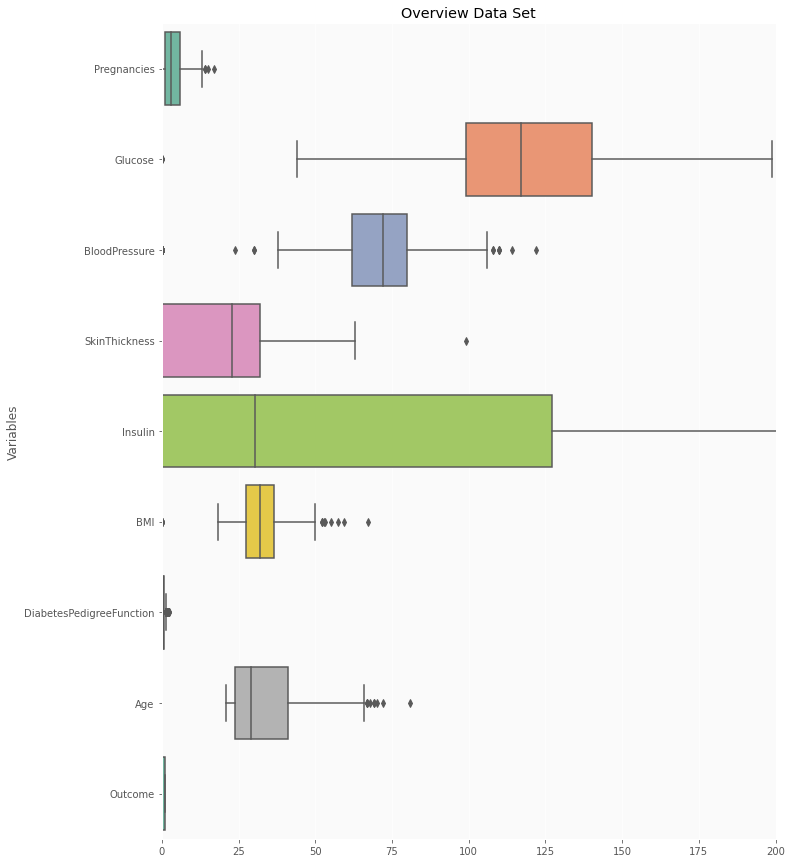

In [0]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df_final, 
  orient = 'h', 
  palette = 'Set2')

In [0]:
diabetes_data_copy = df_final.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [0]:
diabetes_data_copy.corr()

Pregnancies 
 Glucose 
 BloodPressure 
 SkinThickness 
 Insulin 
 BMI 
 DiabetesPedigreeFunction 
 Age 
 Outcome 
 
 
 
 
 Pregnancies 
 1.000000 
 0.128135 
 0.214178 
 0.100239 
 0.082171 
 0.021719 
 -0.033523 
 0.544341 
 0.221898 
 
 
 Glucose 
 0.128135 
 1.000000 
 0.223192 
 0.228043 
 0.581186 
 0.232771 
 0.137246 
 0.267136 
 0.494650 
 
 
 BloodPressure 
 0.214178 
 0.223192 
 1.000000 
 0.226839 
 0.098272 
 0.289230 
 -0.002805 
 0.330107 
 0.170589 
 
 
 SkinThickness 
 0.100239 
 0.228043 
 0.226839 
 1.000000 
 0.184888 
 0.648214 
 0.115016 
 0.166816 
 0.259491 
 
 
 Insulin 
 0.082171 
 0.581186 
 0.098272 
 0.184888 
 1.000000 
 0.228050 
 0.130395 
 0.220261 
 0.303454 
 
 
 BMI 
 0.021719 
 0.232771 
 0.289230 
 0.648214 
 0.228050 
 1.000000 
 0.155382 
 0.025841 
 0.313680 
 
 
 DiabetesPedigreeFunction 
 -0.033523 
 0.137246 
 -0.002805 
 0.115016 
 0.130395 
 0.155382 
 1.000000 
 0.033561 
 0.173844 
 
 
 Age 
 0.544341 
 0.267136 
 0.330107 
 0.166816 
 0.220261 
 0.025841 
 0.033561 
 1.000000 
 0.238356 
 
 
 Outcome 
 0.221898 
 0.494650 
 0.170589 
 0.259491 
 0.303454 
 0.313680 
 0.173844 
 0.238356 
 1.000000

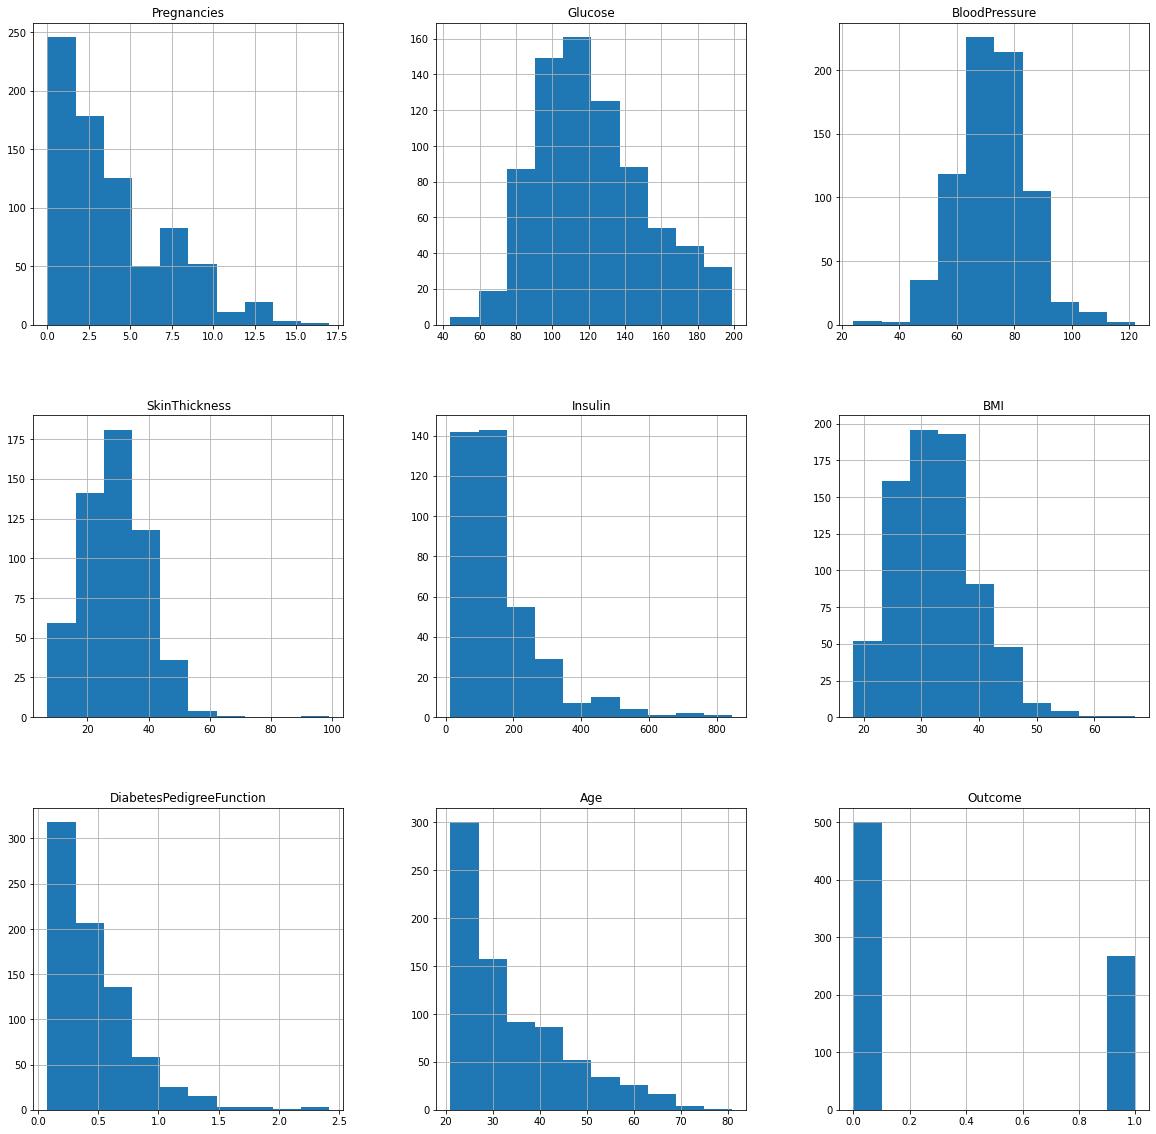

In [0]:
p = diabetes_data_copy.hist(figsize = (20,20))


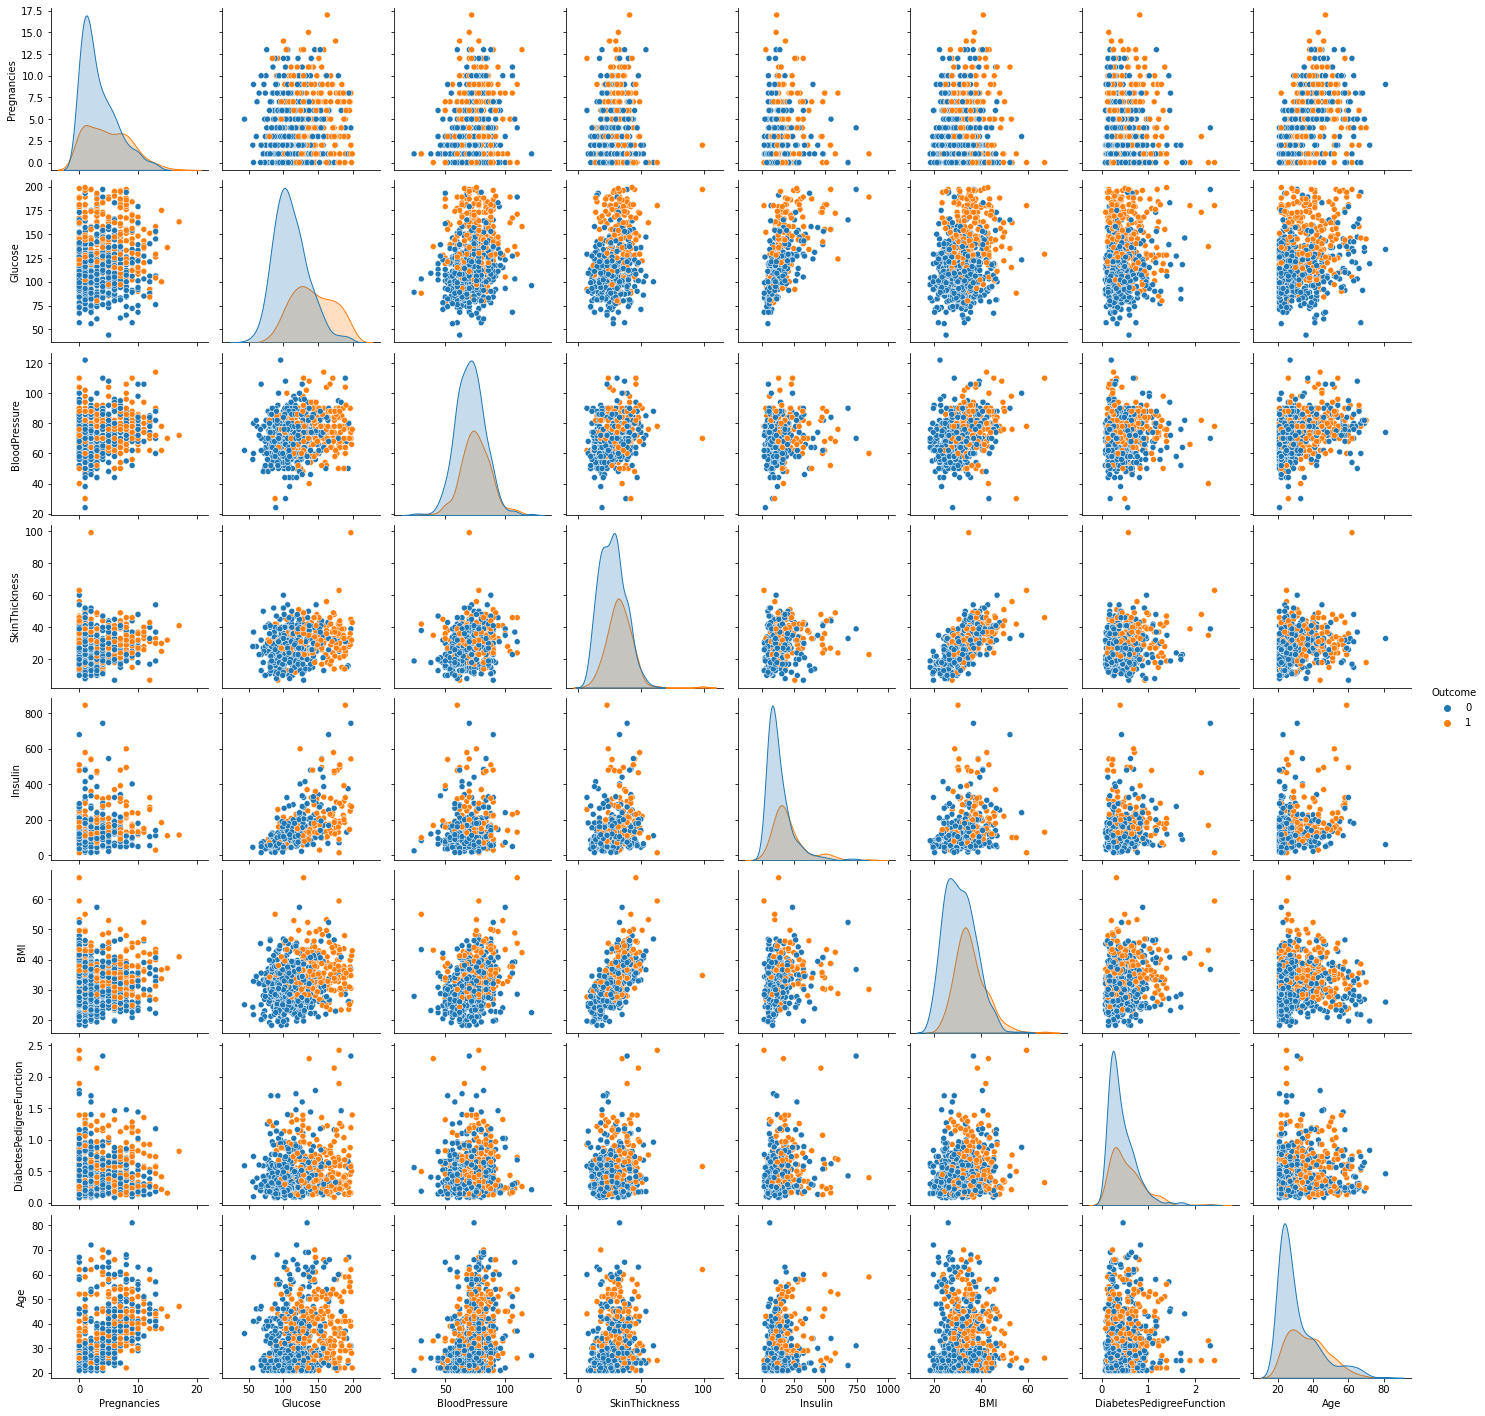

In [0]:
import seaborn as sns

p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')


In [0]:
from pyspark.sql import SQLContext

spark_dff = sqlContext.createDataFrame(diabetes_data_copy)

In [0]:
spark_dff.take(1)

Out[12]: [Row(Pregnancies=6, Glucose=148.0, BloodPressure=72.0, SkinThickness=35.0, Insulin=None, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)]

In [0]:
trainDF, testDF = spark_dff.randomSplit([.8, .2], seed=42)
print(f"""There are {trainDF.count()} rows in the training set, and {testDF.count()} in the test set""")

There are 615 rows in the training set, and 153 in the test set


In [0]:
from pyspark.ml.feature import StringIndexer, VectorIndexer
labelIndexer = StringIndexer(inputCol="Outcome", outputCol="indexedLabel").fit(spark_dff)

In [0]:
# Here, the last column is the category column
inputCols = trainDF.columns[0: len (trainDF.columns) - 1]
from pyspark.ml.feature import VectorAssembler
vecAssembler = VectorAssembler(\
                               inputCols = inputCols, \
                               outputCol = "features") \
                              .setHandleInvalid("skip")

In [0]:
vecTrainDF = vecAssembler.transform(trainDF)
vecTrainDF.select ("features").show(5, False)

+-------------------------------------------+
|features                                   |
+-------------------------------------------+
|[0.0,100.0,88.0,60.0,110.0,46.8,0.962,31.0]|
|[0.0,118.0,84.0,47.0,230.0,45.8,0.551,31.0]|
|[1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0]  |
|[1.0,95.0,66.0,13.0,38.0,19.6,0.334,25.0]  |
|[1.0,97.0,66.0,15.0,140.0,23.2,0.487,22.0] |
+-------------------------------------------+
only showing top 5 rows



In [0]:
from pyspark.ml.feature import StandardScaler
stdScaler = StandardScaler(inputCol="features", \
                        outputCol="scaledFeatures", \
                        withStd=True, \
                        withMean=False)

In [0]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(maxIter=100, \
                        regParam=0.3, \
                        elasticNetParam=0.1, \
                        featuresCol="scaledFeatures", \
                        family = "binomial", \
                        labelCol="Outcome")
from pyspark.ml import Pipeline
pipeline_lr = Pipeline(stages=[vecAssembler, stdScaler, lr])
pipelineModel_lr = pipeline_lr.fit(trainDF)

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Create both evaluators
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction")
evaluator = BinaryClassificationEvaluator(labelCol="Outcome", rawPredictionCol="prediction", metricName='areaUnderROC')

# Make predicitons
predictionAndTarget = pipelineModel_lr.transform(testDF).select("Outcome", "prediction")

# Get metrics
acc = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "accuracy"})
f1 = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "f1"})
weightedPrecision = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "weightedPrecision"})
weightedRecall = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "weightedRecall"})
auc = evaluator.evaluate(predictionAndTarget)
print(acc,f1,weightedPrecision,weightedRecall)

0.7857142857142857 0.7404129793510325 0.8359375 0.7857142857142857


In [0]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
from sklearn.metrics import confusion_matrix
y_true = predictionAndTarget.select("Outcome")
y_true = y_true.toPandas()

y_pred = predictionAndTarget.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=[0,1])

Out[22]: array([[49,  0],
       [15,  6]])

Confusion matrix, without normalization
[[47  2]
 [ 9 12]]


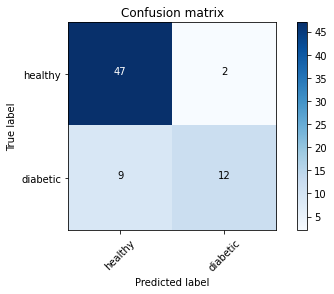

In [0]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['healthy','diabetic'],
                      title='Confusion matrix')
plt.show()

In [0]:
from pyspark.ml.classification import LinearSVC
lsvc = LinearSVC(maxIter=10, \
                 regParam=0.1, \
                 featuresCol="scaledFeatures", \
                 labelCol="Outcome")
from pyspark.ml import Pipeline
pipeline_lsvc = Pipeline(stages=[vecAssembler, stdScaler, lsvc])
pipelineModel_lsvc = pipeline_lsvc.fit(trainDF)

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Create both evaluators
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction")
evaluator = BinaryClassificationEvaluator(labelCol="Outcome", rawPredictionCol="prediction", metricName='areaUnderROC')

# Make predicitons
predictionAndTarget = pipelineModel_lsvc.transform(testDF).select("Outcome", "prediction")

# Get metrics
acc = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "accuracy"})
f1 = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "f1"})
weightedPrecision = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "weightedPrecision"})
weightedRecall = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "weightedRecall"})
auc = evaluator.evaluate(predictionAndTarget)
print(acc,f1,weightedPrecision,weightedRecall)

0.7142857142857143 0.608628659476117 0.7971014492753623 0.7142857142857142


Confusion matrix, without normalization
[[47  2]
 [ 9 12]]


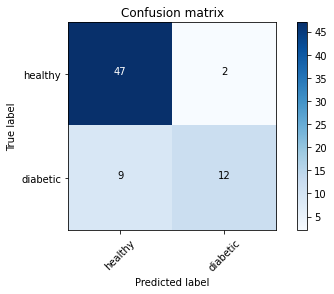

In [0]:
from sklearn.metrics import confusion_matrix
y_true = predictionAndTarget.select("Outcome")
y_true = y_true.toPandas()

y_pred = predictionAndTarget.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=[0,1])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['healthy','diabetic'],
                      title='Confusion matrix')
plt.show()

In [0]:
from pyspark.ml.classification import GBTClassifier
# Train a GBT model.
gbt = GBTClassifier(labelCol="Outcome", \
                    featuresCol="scaledFeatures", \
                    maxIter=10)
from pyspark.ml import Pipeline
pipeline_gbt = Pipeline(stages=[vecAssembler, stdScaler, gbt])
pipelineModel_gbt = pipeline_gbt.fit(trainDF)

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Create both evaluators
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction")
evaluator = BinaryClassificationEvaluator(labelCol="Outcome", rawPredictionCol="prediction", metricName='areaUnderROC')

# Make predicitons
predictionAndTarget = pipelineModel_gbt.transform(testDF).select("Outcome", "prediction")

# Get metrics
acc = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "accuracy"})
f1 = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "f1"})
weightedPrecision = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "weightedPrecision"})
weightedRecall = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "weightedRecall"})
auc = evaluator.evaluate(predictionAndTarget)
print(acc,f1,weightedPrecision,weightedRecall)

0.8 0.7933952528379773 0.7928967813540512 0.8


Confusion matrix, without normalization
[[47  2]
 [ 9 12]]


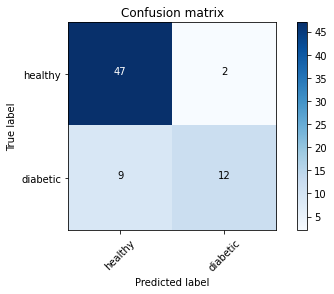

In [0]:
from sklearn.metrics import confusion_matrix
y_true = predictionAndTarget.select("Outcome")
y_true = y_true.toPandas()

y_pred = predictionAndTarget.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=[0,1])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['healthy','diabetic'],
                      title='Confusion matrix')
plt.show()

In [0]:
from pyspark.ml.classification import RandomForestClassifier
# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="Outcome", \
                            featuresCol="scaledFeatures", \
                            numTrees=50)
from pyspark.ml import Pipeline
pipeline_rf = Pipeline(stages=[vecAssembler, stdScaler, rf])
pipelineModel_rf = pipeline_rf.fit(trainDF)

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Create both evaluators
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="Outcome", predictionCol="prediction")
evaluator = BinaryClassificationEvaluator(labelCol="Outcome", rawPredictionCol="prediction", metricName='areaUnderROC')

# Make predicitons
predictionAndTarget = pipelineModel_rf.transform(testDF).select("Outcome", "prediction")

# Get metrics
acc = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "accuracy"})
f1 = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "f1"})
weightedPrecision = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "weightedPrecision"})
weightedRecall = evaluatorMulti.evaluate(predictionAndTarget, {evaluatorMulti.metricName: "weightedRecall"})
auc = evaluator.evaluate(predictionAndTarget)
print(acc,f1,weightedPrecision,weightedRecall)

0.8428571428571429 0.8323809523809523 0.8446428571428571 0.8428571428571427


Confusion matrix, without normalization
[[47  2]
 [ 9 12]]


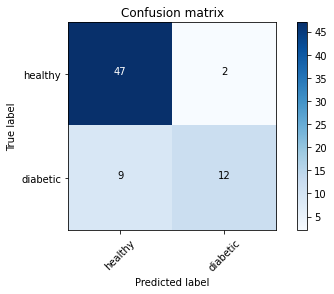

In [0]:
from sklearn.metrics import confusion_matrix
y_true = predictionAndTarget.select("Outcome")
y_true = y_true.toPandas()

y_pred = predictionAndTarget.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=[0,1])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['healthy','diabetic'],
                      title='Confusion matrix')
plt.show()